In [46]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
%%sh
./run.sh

Experiment date and time: Wed Apr 26 01:35:52 PM PDT 2023
Number of branches: 
262665651
Number of mispredictions: 
112379880


In [48]:
def clean_df(df):
    df = df.fillna(-1)
    df = df.replace(r'[^0-9]+',-1)
    df = df.replace('',-1)
    df = df.replace(' ',-1)
    df = df.replace('\n',-1)
    return df

In [49]:
data = pd.read_csv("results.csv", delim_whitespace=True) 
data = clean_df(data)

data["Clock"] = pd.to_numeric(data["Clock"],errors='coerce')
data["Instns"] = pd.to_numeric(data["Instns"],errors='coerce')
data["DEC-uops"] = pd.to_numeric(data["DEC-uops"],errors='coerce')
data["DSB-uops"] = pd.to_numeric(data["DSB-uops"],errors='coerce')
data["LSD-uops"] = pd.to_numeric(data["LSD-uops"],errors='coerce')

data["Instns"] = (data["Instns"] - 1000) // 1000
data["DEC-uops"] = data["DEC-uops"] / 1000
data["DSB-uops"] = data["DSB-uops"] / 1000
data["LSD-uops"] = data["LSD-uops"] / 1000

In [50]:
data

,Clock,Instns,DEC-uops,DSB-uops,LSD-uops
0,611,1,0.029,0.044,1.053
1,531,1,0.011,0.055,1.056
2,534,1,0.011,0.058,1.053
3,532,1,0.011,0.058,1.053
4,535,1,0.011,0.058,1.053
...,...,...,...,...,...
5045,8768,101,69.078,32.000,0.000
5046,8774,101,69.078,32.000,0.000
5047,8789,101,69.078,32.000,0.000
5048,8798,101,69.078,32.000,0.000


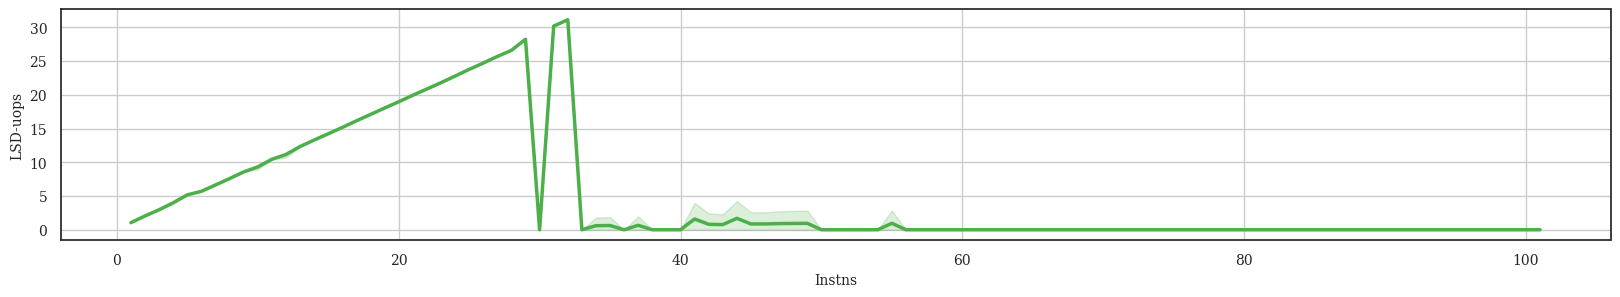

In [51]:

def set_style():
    plt.rcParams["font.family"] = "serif"
    plt.rcParams['pdf.fonttype'] = 42
    plt.rcParams['ps.fonttype'] = 42
    sns.set(rc={'figure.figsize':(20,3),"font.size":10, "font.family": "serif", 
                "axes.titlesize":10,"axes.labelsize": 10, "ytick.labelsize":10, 
                 "xtick.labelsize":10 , 'legend.fontsize':10, 'legend.title_fontsize': 10}, style="white")

set_style()

p = sns.lineplot(data=data, x="Instns", y="LSD-uops", marker="o", color=sns.color_palette("Set1")[2], linewidth=2.5, markersize = 0)
p.grid()
# p.set_xscale('log', base=2)
# p.set(xlim=(0,9))
# p.set(ylim=(0,3))

# Saving the Seaborn Figure:
# plt.savefig('res.pdf', bbox_inches='tight')

In [52]:
# Select the columns to use for the bar plot
cols = ["LSD-uops", "DSB-uops", "DEC-uops"]

# Group the data by "BrRetired" and calculate the mean for each group
grouped = data.groupby("BrRetired")[cols].mean()

# Calculate the total sum for each row
totals = grouped.sum(axis=1)

# Calculate the percentage of each data point over the total sum for each row
percentages = grouped.div(totals, axis=0)

# Reset the index to make "BrRetired" a column again
percentages = percentages.reset_index()

# Melt the dataframe to create a "long" format for Seaborn
melted = pd.melt(percentages, id_vars="BrRetired", var_name="Data", value_name="Percentage")

# Pivot the melted dataframe to create a "wide" format for Seaborn
pivot = melted.pivot(index="BrRetired", columns="Data", values="Percentage")

# Create the bar plot using Seaborn
sns.set(rc={'figure.figsize':(15,5)})
sns.set_style("whitegrid")
sns.set_palette("colorblind")
sns.set_context("talk")
ax = pivot.plot(kind="bar", stacked=True, width=2)

# Set the axis labels and legend
ax.legend(title="Data", loc="center right",bbox_to_anchor=(1.25, 0.5), frameon=False)
ax.set_xlabel("BrRetired")
ax.set_ylabel("Percentage")
# ax.set(xlim=(0,512))

# Remove the x-tick labels
ax.set_xticklabels([])
    
# Show the plot
plt.show()

KeyError: 'BrRetired'

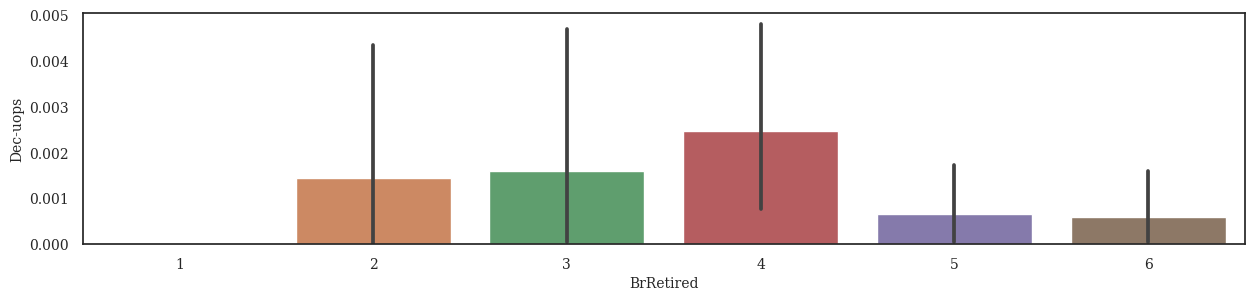

In [ ]:
def set_style():
    plt.rcParams["font.family"] = "serif"
    plt.rcParams['pdf.fonttype'] = 42
    plt.rcParams['ps.fonttype'] = 42
    sns.set(rc={'figure.figsize':(15,3),"font.size":10, "font.family": "serif", 
                "axes.titlesize":10,"axes.labelsize": 10, "ytick.labelsize":10, 
                 "xtick.labelsize":10 , 'legend.fontsize':10, 'legend.title_fontsize': 10}, style="white")

set_style()

g = sns.barplot(data=data, x="BrRetired", y="Dec-uops")